<a href="https://colab.research.google.com/github/KIRAN3031/Python_Programming/blob/main/A%26DS_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algorithm Design and Analysis


## 1. Merge Sort




In [ ]:
import math
import matplotlib.pyplot as plt

In [ ]:
def Merge(array, low, mid, high):
    n1 = mid - low + 1
    n2 = high - mid
    left = array[low:mid+1]
    right = array[mid+1:high+1]
    i = 0
    j = 0
    k = low
    while i<n1 and j<n2:
      if left[i] <= right[j]:
        array[k] = left[i]
        i += 1
      else:
        array[k] = right[j]
        j += 1
      k += 1
    while i<n1:
      array[k] = left[i]
      i += 1
      k += 1
    while j<n2:
      array[k] = right[j]
      j += 1
      k += 1

    return array

In [ ]:
def Merge_sort(array, low, high):
    if low < high:
        mid = (low + high) // 2
        Merge_sort(array, low, mid)
        Merge_sort(array, mid + 1, high)
        Merge(array, low, mid, high)

In [ ]:
arr = [10,9,8,7,6,5,4,3,2,1]
print("The array before sorting is :",arr)
Merge_sort(arr,0,len(arr)-1)
print("The array after sorting is",arr)

The array before sorting is : [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
The array after sorting is [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


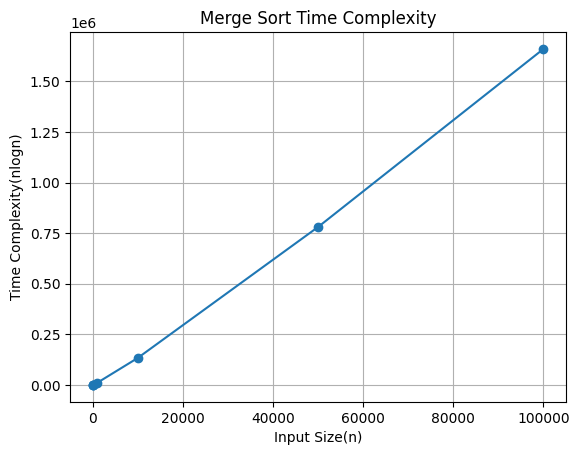

In [ ]:
input_sizes = [5, 10, 100, 1000, 10000, 50000, 100000]
time_complexity=[n * math.log2(n) for n in input_sizes]

plt.plot(input_sizes, time_complexity,marker = 'o',linestyle = '-')
plt.xlabel('Input Size(n)')
plt.ylabel('Time Complexity(nlogn)')
plt.title('Merge Sort Time Complexity')
plt.grid(True)
plt.show()

##2. Quick Sort


In [ ]:
def Qucik_sort(array, low, high):
    if low < high:
      j = Partition(array, low, high)
      Qucik_sort(array, low, j-1)
      Qucik_sort(array, j+1, high)

In [ ]:
def Partition(array,low,high):
  pivot = array[low]
  i = low
  j = high+1
  while True:
    i += 1
    while array[i] < pivot:
      i += 1
    j -= 1
    while array[j] > pivot:
      j -= 1
    if i >= j:
      break
    array[i],array[j] = array[j],array[i]
    array[low],array[j] = array[j],array[low]
  return j


In [ ]:
arr = [10,9,8,7,6,5,4,3,2,1]
print("The array before sorting is :",arr)
Merge_sort(arr,0,len(arr)-1)
print("The array after sorting is",arr)

The array before sorting is : [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
The array after sorting is [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


## 3. Articulation Point

In [ ]:
from collections import defaultdict

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = defaultdict(list)
        self.time = 0

    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    def articulation_point_util(self, u, visited, disc, low, parent, ap):
        visited[u] = True
        disc[u] = low[u] = self.time
        self.time += 1
        children = 0

        for v in self.graph[u]:
            if not visited[v]:
                parent[v] = u
                children += 1
                self.articulation_point_util(v, visited, disc, low, parent, ap)

                low[u] = min(low[u], low[v])
                if parent[u] == -1 and children > 1:
                    ap[u] = True
                if parent[u] != -1 and low[v] >= disc[u]:
                    ap[u] = True
            elif v != parent[u]:
                low[u] = min(low[u], disc[v])

    def find_articulation_points(self):
        visited = [False] * self.V
        disc = [-1] * self.V
        low = [-1] * self.V
        parent = [-1] * self.V
        ap = [False] * self.V

        for i in range(self.V):
            if not visited[i]:
                self.articulation_point_util(i, visited, disc, low, parent, ap)

        print("Articulation points:")
        for i in range(self.V):
            if ap[i]:
                print(i)

# Example usage
g = Graph(5)
g.add_edge(1, 0)
g.add_edge(0, 2)
g.add_edge(2, 1)
g.add_edge(0, 3)
g.add_edge(3, 4)
g.find_articulation_points()

Articulation points:
0
3


## 4. Knapscak

In [ ]:
profits = [10, 5, 15, 7, 6, 18, 3]
weights = [2, 3, 5, 7, 1, 4, 1]
capacity = 15

# Calculate profit to weight ratio and store index
ratios = [(profits[i] / weights[i], i) for i in range(len(profits))]
# Sort by ratio descending
ratios.sort(key=lambda x: x[0], reverse=True)

total_profit = 0.0
fractions = [0] * len(profits)
remaining_capacity = capacity

for ratio, i in ratios:
    if weights[i] <= remaining_capacity:
        fractions[i] = 1
        total_profit += profits[i]
        remaining_capacity -= weights[i]
    else:
        fractions[i] = remaining_capacity / weights[i]
        total_profit += profits[i] * fractions[i]
        break

print("Fractions of items taken:")
for i, fraction in enumerate(fractions):
    print(f"Item {i + 1}: {fraction:.2f}")
print(f"Total profit: {total_profit:.2f}")


Fractions of items taken:
Item 1: 1.00
Item 2: 0.67
Item 3: 1.00
Item 4: 0.00
Item 5: 1.00
Item 6: 1.00
Item 7: 1.00
Total profit: 55.33


## Job Sequencing

In [40]:
deadlines = [2, 1, 2, 1, 3]
profits = [100, 19, 27, 25, 15]
n = len(deadlines)

jobs = sorted([(profits[i], deadlines[i], i+1) for i in range(n)], key=lambda x: x[0], reverse=True)

max_deadline = max(deadlines)
slots = [-1] * max_deadline  # -1 means slot is free

total_profit = 0
scheduled_jobs = []

for profit, deadline, job_id in jobs:
    for slot in range(min(deadline, max_deadline) - 1, -1, -1):
        if slots[slot] == -1:
            slots[slot] = job_id
            total_profit += profit
            scheduled_jobs.append(job_id)
            break  # slot found, move to next job

print("Scheduled jobs:", scheduled_jobs)
print("Total profit:", total_profit)


Scheduled jobs: [1, 3, 5]
Total profit: 142


## Prims Algorithm

In [42]:
INF = 100

# Example input: number of vertices and cost adjacency matrix (1-based indexing)
n = 7
cost = [
    [],  # index 0 unused for 1-based
    [0, 100, 28, 100, 100, 100, 10, 100],
    [0, 28, 100, 16, 100, 100, 100, 14],
    [0, 100, 16, 100, 12, 100, 100, 100],
    [0, 100, 100, 12, 100, 22, 100, 18],
    [0, 100, 100, 100, 22, 100, 25, 24],
    [0, 10, 100, 100, 100, 25, 100, 100],
    [0, 100, 14, 100, 18, 24, 100, 100]
]

t = [[0, 0] for _ in range(n-1)]
near = [INF] * (n+1)
mincost = 0
u = v = 0

# Find the minimum cost edge
min_ = INF
for i in range(1, n+1):
    for j in range(1, n+1):
        if i != j and cost[i][j] < min_:
            min_ = cost[i][j]
            u, v = i, j

t[0][0] = u
t[0][1] = v
mincost += cost[u][v]

near[u] = near[v] = 0

for i in range(1, n+1):
    if near[i] != 0:
        if cost[i][u] < cost[i][v]:
            near[i] = u
        else:
            near[i] = v

# Construct the minimum spanning tree
for i in range(1, n-1):
    min2 = INF
    k = 0
    for j in range(1, n+1):
        if near[j] != 0 and cost[j][near[j]] < min2:
            min2 = cost[j][near[j]]
            k = j
    t[i][0] = k
    t[i][1] = near[k]
    mincost += cost[k][near[k]]
    near[k] = 0

    for j in range(1, n+1):
        if near[j] != 0 and cost[j][k] < cost[j][near[j]]:
            near[j] = k

print("Minimum spanning tree edges:")
for i in range(n-1):
    print(f"{t[i][0]} - {t[i][1]}")

print("Total cost of MST:", mincost)


Minimum spanning tree edges:
1 - 6
5 - 6
4 - 5
3 - 4
2 - 3
7 - 2
Total cost of MST: 99


## Single source shortest path (Dijkstra)

In [45]:
import heapq

def dijkstra(graph, start):
    n = len(graph)
    dist = [float('inf')] * n
    dist[start] = 0
    priority_queue = [(0, start)]

    while priority_queue:
        current_dist, u = heapq.heappop(priority_queue)
        if current_dist > dist[u]:
            continue
        for v, weight in enumerate(graph[u]):
            if weight != 0 and weight != float('inf'):
                new_dist = dist[u] + weight
                if new_dist < dist[v]:
                    dist[v] = new_dist
                    heapq.heappush(priority_queue, (new_dist, v))
    return dist

# Example adjacency matrix (0: no edge, other: weight)
graph = [
    [0, 2, 5, float('inf')],
    [2, 0, 3, float('inf')],
    [5, 3, 0, 1],
    [float('inf'), float('inf'), 1, 0]
]

start_node = 0
distances = dijkstra(graph, start_node)
print("Vertex: Distance from start", list(enumerate(distances)))


Vertex: Distance from start [(0, 0), (1, 2), (2, 5), (3, 6)]


## Sum of subset

In [46]:
def sum_of_subsets(arr, target):
    n = len(arr)
    found = False

    # Iterate over all possible subsets using bitmasks
    for i in range(1 << n):
        current_sum = 0
        subset = []
        for j in range(n):
            # Check if jth element is included in the subset
            if (i & (1 << j)) != 0:
                current_sum += arr[j]
                subset.append(arr[j])
        if current_sum == target:
            found = True
            print("Subset found:", subset)

    if not found:
        print("No subset with the given sum.")

# Example usage:
arr = [5, 10, 11, 12, 15, 18, 20]
target = 30
sum_of_subsets(arr, target)


Subset found: [5, 10, 15]
Subset found: [12, 18]
Subset found: [10, 20]


## Optimal Binary Search Tree (OBST)

In [47]:
import sys

def optimal_bst(p, q, n):
    # p: probabilities of keys (1-based indexing)
    # q: probabilities of dummy keys
    # n: number of keys

    c = [[0] * (n + 1) for _ in range(n + 1)]
    w = [[0] * (n + 1) for _ in range(n + 1)]
    r = [[0] * (n + 1) for _ in range(n + 1)]

    for i in range(n + 1):
        c[i][i] = 0
        w[i][i] = q[i]
        r[i][i] = 0

    for length in range(1, n + 1):
        for i in range(n - length + 1):
            j = i + length
            c[i][j] = sys.maxsize
            w[i][j] = w[i][j - 1] + p[j] + q[j]
            for k in range(i + 1, j + 1):  # possible roots
                cost = c[i][k - 1] + c[k][j] + w[i][j]
                if cost < c[i][j]:
                    c[i][j] = cost
                    r[i][j] = k

    return c, r

# Example usage
n = 4
p = [0, 0.1, 0.2, 0.4, 0.3]  # probabilities of keys, 1-based
q = [0.05, 0.1, 0.05, 0.05, 0.05]  # probabilities of dummy keys

cost, root = optimal_bst(p, q, n)

print("Cost matrix:")
for i in range(n + 1):
    print(cost[i])

print("\nRoot matrix:")
for i in range(n + 1):
    print(root[i])


Cost matrix:
[0, 0.25, 0.75, 1.7000000000000002, 2.45]
[0, 0, 0.35000000000000003, 1.1500000000000001, 1.9000000000000001]
[0, 0, 0, 0.5, 1.25]
[0, 0, 0, 0, 0.39999999999999997]
[0, 0, 0, 0, 0]

Root matrix:
[0, 1, 2, 2, 3]
[0, 0, 2, 3, 3]
[0, 0, 0, 3, 3]
[0, 0, 0, 0, 4]
[0, 0, 0, 0, 0]
